**Logistic regression** is a statistical and machine learning method used for binary classification tasks, where the target variable has two possible outcomes (e.g., 0 or 1, true or false). It models the probability of an event occurring by applying the logistic (sigmoid) function to a linear combination of input features. The output is a value between 0 and 1, interpreted as the likelihood of belonging to a specific class. Logistic regression is widely used in fields like healthcare for predicting outcomes such as disease presence.

Logistic Regression takes the following types of inputs:

1. **Numerical Features**: Continuous variables such as age, income, or temperature. These are directly used in the model.

2. **Categorical Features**: Variables like gender or city, which are converted into numerical form using encoding techniques (e.g., one-hot encoding or label encoding).

3. **Binary Features**: Variables that represent true/false or 0/1 scenarios, such as whether a customer has a membership.

4. **Normalized/Scaled Features**: Although not strictly required, input features are often normalized or scaled for better model performance and faster convergence.

Ensure inputs are preprocessed appropriately for optimal results.

**Benefits of Logistic Regression over Linear Regression:**

Logistic Regression offers several benefits over Linear Regression, particularly for classification problems:  

1. **Handles Binary Outputs**: Logistic Regression is designed for mainly binary classification, providing probabilities, whereas Linear Regression is unsuitable for such tasks.  
   
2. **Bounded Output**: Logistic Regression outputs probabilities (values between 0 and 1), unlike Linear Regression, which can produce values outside this range.  

3. **Non-Linear Decision Boundaries**: While the model itself is linear, Logistic Regression can approximate non-linear boundaries by combining features or using transformations.  

4. **Better for Categorical Targets**: Logistic Regression directly models categorical outcomes without additional encoding steps.  

5. **Probabilistic Interpretation**: Provides the likelihood of class membership, aiding in decision-making.  

6. **Robustness to Outliers**: Logistic Regression is less sensitive to outliers compared to Linear Regression, especially in classification tasks.

Regression predicts continuous numerical values, while classification focuses on categorizing data into discrete classes. Linear regression algorithms are commonly used for regression tasks, whereas logistic regression is employed for classification problems.

**Applications of Logistic Regression:**
Logistic Regression is widely used in various fields for classification tasks. Here are some common applications:  

1. **Healthcare**: Predicting disease presence (e.g., diabetes, cancer) based on patient data.  
2. **Finance**: Assessing credit risk or predicting loan defaults.  
3. **Marketing**: Classifying customers for targeted campaigns (e.g., likelihood of purchase or churn).  
4. **Human Resources**: Predicting employee attrition or recruitment success.  
5. **E-commerce**: Recommending products by predicting user preferences.  
6. **Social Sciences**: Modeling survey responses or voting behavior.  
7. **Fraud Detection**: Identifying fraudulent transactions or activities.  

Its simplicity, interpretability, and efficiency make it ideal for binary classification problems.

Let us start by importing the required module.

In [ ]:
import numpy

Now, store the independent variables in X and the dependent variable in y.

In [ ]:
#X represents the size of a tumor in centimeters.
# Array to column vector.
# rephrase will form a column vector , -1 row will be adjusted according to entries, 1 will make it as column
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
print(X)
#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

[[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]]


As we shall use a method from the sklearn module,  we import that module as well.

In [ ]:
from sklearn import linear_model

We have used the LogisticRegression() method for creating the logistic regression object from the sklearn module.

This object comprises a method called fit() that takes the independent and dependent values as parameters by filling the regression object with data that describes the relationship.

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

Here we have a logistic regression object that is ready for checking whether a tumor is cancerous based on the tumor size.

In [ ]:
#predict if tumor is cancerous where the size is 3.46cm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


We predicted that a tumor with a size of 3.46cm is not cancerous.

In logistic regression, the coefficient is the expected change in log odds of having the outcome per unit change in X.

In [ ]:
log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03557295]]


It implies that as a tumor's size increases by 1 cm, the odds of it being cancerous increase by 4x.

We use the coefficient and intercept values to determine the likelihood that each tumor is malignant. Let's create a function that utilizes the model's coefficient and intercept values to return a new value. This new value represents the probability that the observed tumor is cancerous.

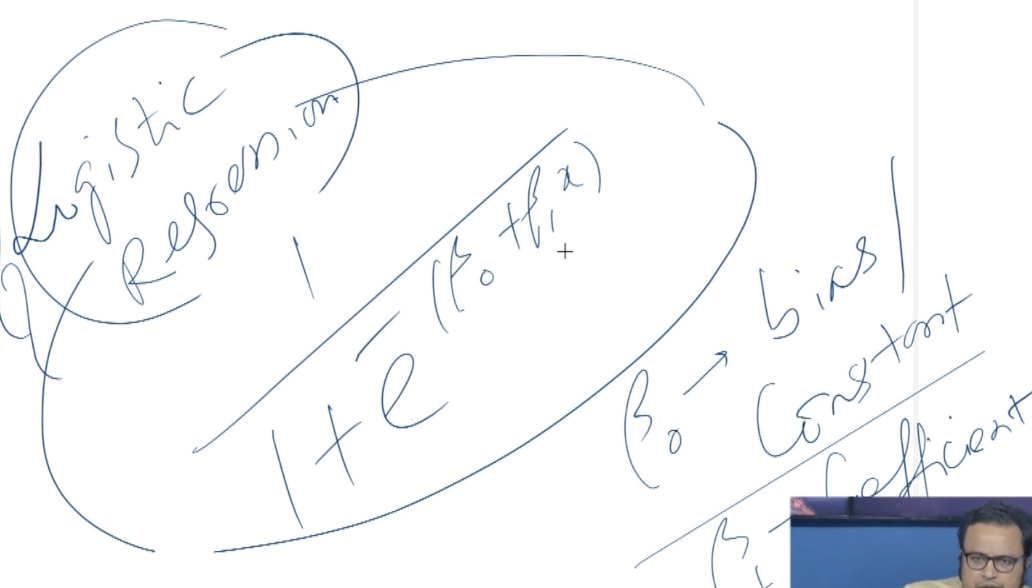

In [ ]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_    #formula analogous to linear regression for extracting the coefficient and the intercept.
  odds = numpy.exp(log_odds)                     #To convert the log-odds to odds we must exponentiate the log-odds.
  probability = odds / (1 + odds)                #Converting the odds to probability by dividing it by 1 plus the odds.
  return(probability)

print(logit2prob(logr, X))

[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


The output can be interpreted in the following way:

The probability that a tumor with the size 3.78cm is cancerous is 60.75% (approx).
The probability that a tumor with the size 2.44cm is cancerous is 19.268% (approx).
The probability that a tumor with the size 2.09cm is cancerous is 12.775% (approx)
and so on.